In [46]:
import numpy as np
import pandas as pd
import os
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import numpy as np


data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
main_df = pd.read_csv(data_file, sep='\t', low_memory=False)
main_df.head(3)

,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [71]:
x = np.random.rand(10)
print(x)
ids = np.where(x > 0.5)[0]
ids

[0.46123391 0.02713682 0.69469394 0.40680506 0.95634835 0.66815753
 0.43324818 0.17264826 0.28094182 0.87642922]


array([2, 4, 5, 9])

In [74]:
x = np.random.rand(10)
print(x)
mark = np.logical_and(x > 0.3, x < 0.7)
np.where(mark)

[0.9094266  0.95892682 0.83456644 0.22841226 0.58737838 0.16615179
 0.48097261 0.85953796 0.49970964 0.04206128]


(array([4, 6, 8]),)

In [99]:
def do_group(target_ids, mapping, output):
    print("do")
    dgs = np.array([dg for dg, cid in zip(mapping["dg"], mapping["complex_ids"]) if cid in target_ids])
    cids = np.array([cid for cid in mapping["complex_ids"] if cid in target_ids])
    assert(len(dgs) == len(cids))
    if len(dgs) == 0:
        return
    
    id_max = np.argmax(dgs)
    id_min = np.argmin(dgs)
    ids_group1 = np.where(dgs[id_max] - dgs < 1.0)[0]
    ids_group2 = np.where(dgs - dgs[id_min] < 1.0)[0]
    print(cids)
    cids_group1 = cids[ids_group1]
    cids_group2 = cids[ids_group2]
    output.append({'cids': cids_group1, 'dgs': dgs[ids_group1]})
    output.append({'cids': cids_group2, 'dgs': dgs[ids_group2]})
    
    # compute other_ids with cids_group1 and cids_group2
    mark = np.logical_and(dgs[id_max] - dgs >= 1.0, dgs - dgs[id_min] >= 1.0)
    other_ids = np.where(mark)
    other_cids = cids[other_ids]
    
    if len(other_ids) > 0:
        do_group(other_cids, mapping, output)
    

cids = cluster2info['cluster_pair_1787']['complex_ids']
print(len(cids))
mapping = cluster2info['cluster_pair_1787']
groups = []
do_group(cids, mapping, groups)
print(groups, sum([len(x) for x in groups]))

26
do
[6111 6112 6113 6114 6115 6116 6117 6485 6486 6487 6488 6489 6490 6491
 6492 6493 6494 6799 6800 6801 6802 6803 6804 6805 6806 6807]
do
[{'cids': array([6111, 6112, 6113, 6114, 6115, 6116, 6117, 6801, 6802, 6803, 6804,
       6805, 6806, 6807]), 'dgs': array([-4.565, -4.565, -4.64 , -4.64 , -4.725, -4.64 , -4.64 , -4.565,
       -4.565, -4.64 , -4.64 , -4.725, -4.64 , -4.64 ])}, {'cids': array([6485, 6486, 6487, 6488, 6489, 6490, 6491, 6492, 6493, 6494, 6799,
       6800]), 'dgs': array([-8.94, -8.94, -8.89, -9.  , -8.7 , -8.89, -8.79, -8.66, -8.89,
       -8.89, -9.  , -9.  ])}] 4


In [ ]:
for x in groups:
    mapping['complex_ids']

In [98]:
mapping

{'complex_ids': array([6111, 6112, 6113, 6114, 6115, 6116, 6117, 6485, 6486, 6487, 6488,
        6489, 6490, 6491, 6492, 6493, 6494, 6799, 6800, 6801, 6802, 6803,
        6804, 6805, 6806, 6807]),
 'dg_var': 4.4994232248520705,
 'dg': array([-4.565, -4.565, -4.64 , -4.64 , -4.725, -4.64 , -4.64 , -8.94 ,
        -8.94 , -8.89 , -9.   , -8.7  , -8.89 , -8.79 , -8.66 , -8.89 ,
        -8.89 , -9.   , -9.   , -4.565, -4.565, -4.64 , -4.64 , -4.725,
        -4.64 , -4.64 ]),
 'pr_lens': array([336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336,
        336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336]),
 'nc_lens': array([75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75]),
 'pr_max_len': 336,
 'pr_len_rate': 0.0,
 'nc_len_rate': 0.0,
 'size': 26}

In [89]:
import sklearn
print(sklearn.__version__)

1.2.1


In [97]:
# 综合分类数据集
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# 定义数据集
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 为每个类的样本创建散点图
for class_value in range(2):
# 获取此类的示例的行索引
row_ix = where(y == class_value)
# 创建这些样本的散布
pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

IndentationError: expected an indented block (<ipython-input-97-33257c0c3f16>, line 10)

In [87]:
cids = cluster2info['cluster_pair_1787']['complex_ids']

np.array([cid for cid in cluster2info['cluster_pair_1787']["complex_ids"] if cid in cids])

array([6111, 6112, 6113, 6114, 6115, 6116, 6117, 6485, 6486, 6487, 6488,
       6489, 6490, 6491, 6492, 6493, 6494, 6799, 6800, 6801, 6802, 6803,
       6804, 6805, 6806, 6807])

In [66]:


def compute_info(name, df, output):
    
    pr_lengths = np.array([len(x) for x in df["protein_sequence"]])
    nc_lengths  = np.array([len(x) for x in df["nucleotide_sequence"]])
    pr_max_len = pr_lengths.max()
    pr_len_rate = (pr_max_len - pr_lengths.min()) / pr_max_len
    nc_len_rate = (nc_lengths.max() - nc_lengths.min()) / nc_lengths.max() 
    
    dgs = df["dG"].to_numpy()
    dg_var = dgs.var()
    
    info = {
        "complex_ids": df["complex_id"].to_numpy(),
        
        "dg_var": dg_var,
        "dg": dgs,
        
        "pr_lens": pr_lengths,
        "nc_lens": nc_lengths,
        "pr_max_len": pr_max_len,
        "pr_len_rate": pr_len_rate,
        "nc_len_rate": nc_len_rate,
        
        "size": len(df),
        
    }
    output[name] = info

cluster2df = dict()

for clus_name, clus_df in main_df.groupby("cluster_protein_na_pair_index"):
    cluster2df[clus_name] = clus_df

cluster2info = dict()
for clus_name, clus_df in cluster2df.items():
    compute_info(clus_name, clus_df, cluster2info)

for clus_name, clus_info in cluster2info.items():
    do_group(clus_name, clus_info)

In [31]:
clu_with_max_size = ''
max_size = 0
for k, v in cluster2info.items():
    if v['size'] > max_size:
        max_size = v['size']
        clu_with_max_size = k
cluster2info[clu_with_max_size]

{'dg_var': 0.6406935123809522,
 'dg': array([-10.585     , -10.545     , -10.785     , -10.75      ,
        -10.85      , -10.605     , -10.875     , -10.785     ,
        -10.905     ,  -9.71833333,  -9.71833333,  -9.375     ,
         -9.44333333,  -9.44333333, -10.11      ,  -9.49833333,
         -9.49833333,  -9.45666667,  -9.45666667,  -9.75666667,
         -9.75666667,  -9.85666667,  -9.85666667,  -9.80166667,
         -9.80166667,  -9.754     ,  -9.754     , -11.082     ,
        -10.528     , -11.004     , -10.86      , -10.77      ,
        -10.96      , -10.922     , -10.9       , -11.144     ,
        -11.026     , -11.042     ,  -9.036     ,  -9.036     ,
        -11.095     , -11.035     ,  -9.45      , -10.585     ,
        -11.66      , -11.66      , -11.66      , -11.66      ,
        -11.66      , -11.66      , -11.66      , -11.66      ,
        -11.66      , -11.66      , -11.66      , -11.66      ,
        -11.66      , -11.66      , -11.66      , -11.66      ,
   

In [36]:
clu = ''
max_len_rate = 0
for k, v in cluster2info.items():
    if v['pr_len_rate'] > max_len_rate:
        max_len_rate = v['pr_len_rate']
        clu = k
cluster2info[clu]

{'dg_var': 3.0012916666666674,
 'dg': array([-13.3 ,  -8.09, -12.05, -11.58, -13.21, -11.52]),
 'pr_lens': array([616, 380, 441, 616, 448, 328]),
 'nc_lens': array([49, 49, 49, 49, 49, 49]),
 'pr_max_len': 616,
 'pr_len_rate': 0.4675324675324675,
 'nc_len_rate': 0.0,
 'size': 6}

In [37]:
clu = ''
max_len_rate = 0
for k, v in cluster2info.items():
    if v['nc_len_rate'] > max_len_rate:
        max_len_rate = v['nc_len_rate']
        clu = k
cluster2info[clu]

{'dg_var': 0.002866666666666698,
 'dg': array([-11.  , -11.13, -11.05]),
 'pr_lens': array([609, 609, 609]),
 'nc_lens': array([199, 133,  67]),
 'pr_max_len': 609,
 'pr_len_rate': 0.0,
 'nc_len_rate': 0.6633165829145728,
 'size': 3}

In [40]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] > 0.1 and v['pr_len_rate'] > 0.1:
        clus.append(k)
for x in clus:
    print(cluster2info[x])

{'dg_var': 0.566276446280992, 'dg': array([-10.68 , -10.68 , -11.75 , -12.355, -10.94 , -10.68 , -10.68 ,
       -11.75 , -12.69 , -12.355, -10.94 ]), 'pr_lens': array([102, 102, 102, 102,  80, 102, 102, 102, 102, 102,  80]), 'nc_lens': array([27, 27, 27, 27, 18, 27, 27, 27, 16, 27, 18]), 'pr_max_len': 102, 'pr_len_rate': 0.21568627450980393, 'nc_len_rate': 0.4074074074074074, 'size': 11}
{'dg_var': 0.5153372222222223, 'dg': array([-12.238, -12.238, -12.238, -12.215, -12.215, -12.215, -11.51 ,
       -10.98 , -10.98 , -10.98 , -10.98 , -10.98 , -10.98 , -10.98 ,
       -10.98 , -10.98 , -10.98 , -12.28 , -12.28 , -12.28 , -12.238,
       -12.238, -12.215, -12.215, -12.215, -11.51 , -14.08 , -11.28 ,
       -11.28 , -11.28 ]), 'pr_lens': array([282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282,
       282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282,
       282, 225, 225, 225]), 'nc_lens': array([28, 28, 28, 28, 28, 28, 28, 46, 46, 46, 46, 46, 46, 46, 46, 46

In [42]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] > 0.1 or v['pr_len_rate'] > 0.1 and v['dg_var'] > 0.1:
        clus.append(k)
print(len(clus))
for x in clus:
    print(cluster2info[x])
    print()

79
{'dg_var': 0.006400000000000012, 'dg': array([-7.83, -7.99]), 'pr_lens': array([616, 616]), 'nc_lens': array([42, 60]), 'pr_max_len': 616, 'pr_len_rate': 0.0, 'nc_len_rate': 0.3, 'size': 2}

{'dg_var': 0.05014285714285709, 'dg': array([ -9.49,  -9.76,  -9.76, -10.09, -10.09, -10.09, -10.09,  -9.49,
        -9.76,  -9.76, -10.09, -10.09, -10.09, -10.09]), 'pr_lens': array([104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104]), 'nc_lens': array([35, 40, 45, 50, 55, 60, 65, 35, 40, 45, 50, 55, 60, 65]), 'pr_max_len': 104, 'pr_len_rate': 0.0, 'nc_len_rate': 0.46153846153846156, 'size': 14}

{'dg_var': 0.003599999999999953, 'dg': array([-11.  , -11.12]), 'pr_lens': array([609, 609]), 'nc_lens': array([99, 66]), 'pr_max_len': 609, 'pr_len_rate': 0.0, 'nc_len_rate': 0.3333333333333333, 'size': 2}

{'dg_var': 0.0001000000000000135, 'dg': array([-11.05, -11.03]), 'pr_lens': array([609, 609]), 'nc_lens': array([50, 75]), 'pr_max_len': 609, 'pr_len_rate': 0.0, 'nc_len_r

In [44]:
clus = []
for k, v in cluster2info.items():
    if v['dg_var'] > 0.1:
        clus.append(k)
print(len(clus))
for x in clus:
    print(cluster2info[x])
    print()

615
{'dg_var': 0.31640625, 'dg': array([-11.33 , -12.455, -11.33 , -12.455]), 'pr_lens': array([1756, 1756, 1756, 1756]), 'nc_lens': array([17, 17, 17, 17]), 'pr_max_len': 1756, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 4}

{'dg_var': 0.10248437500000018, 'dg': array([-10.5725, -11.22  , -11.22  , -11.22  , -11.19  , -10.5725,
       -10.5725, -10.5725]), 'pr_lens': array([246, 246, 246, 246, 246, 246, 246, 246]), 'nc_lens': array([28, 28, 28, 28, 28, 28, 28, 28]), 'pr_max_len': 246, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 8}

{'dg_var': 0.2012789940828403, 'dg': array([-7.34 , -6.9  , -7.245, -7.54 , -6.875, -7.2  , -7.245, -7.115,
       -8.58 , -7.085, -7.73 , -7.85 , -7.715, -7.34 , -6.9  , -7.245,
       -7.54 , -6.875, -7.2  , -7.245, -7.115, -8.58 , -7.085, -7.73 ,
       -7.85 , -7.715]), 'pr_lens': array([222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222]), 'nc_lens': array([10,

In [59]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] < 0.1 and v['pr_len_rate'] < 0.1 and v['dg_var'] > 0.1:
        clus.append(k)
print(len(clus))
for x in clus:
    print(cluster2info[x])
    print()

565
{'dg_var': 0.31640625, 'dg': array([-11.33 , -12.455, -11.33 , -12.455]), 'pr_lens': array([1756, 1756, 1756, 1756]), 'nc_lens': array([17, 17, 17, 17]), 'pr_max_len': 1756, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 4}

{'dg_var': 0.10248437500000018, 'dg': array([-10.5725, -11.22  , -11.22  , -11.22  , -11.19  , -10.5725,
       -10.5725, -10.5725]), 'pr_lens': array([246, 246, 246, 246, 246, 246, 246, 246]), 'nc_lens': array([28, 28, 28, 28, 28, 28, 28, 28]), 'pr_max_len': 246, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 8}

{'dg_var': 0.2012789940828403, 'dg': array([-7.34 , -6.9  , -7.245, -7.54 , -6.875, -7.2  , -7.245, -7.115,
       -8.58 , -7.085, -7.73 , -7.85 , -7.715, -7.34 , -6.9  , -7.245,
       -7.54 , -6.875, -7.2  , -7.245, -7.115, -8.58 , -7.085, -7.73 ,
       -7.85 , -7.715]), 'pr_lens': array([222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222,
       222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222, 222]), 'nc_lens': array([10,

In [75]:
clus = []
for k, v in cluster2info.items():
    if v['nc_len_rate'] < 0.1 and v['pr_len_rate'] < 0.1 and v['dg_var'] > 2.0:
        clus.append(k)
print(len(clus))
for x in clus:
    print(cluster2info[x])
    print()

68
{'complex_ids': array([3736, 5794, 5795, 5796, 5797]), 'dg_var': 3.3780006666666664, 'dg': array([-14.265     , -10.51333333, -10.51333333, -10.51333333,
       -14.265     ]), 'pr_lens': array([616, 616, 616, 616, 616]), 'nc_lens': array([40, 41, 41, 41, 40]), 'pr_max_len': 616, 'pr_len_rate': 0.0, 'nc_len_rate': 0.024390243902439025, 'size': 5}

{'complex_ids': array([ 252, 1008, 2393, 2395, 4759, 4761]), 'dg_var': 2.512549999999999, 'dg': array([-10.365, -10.365, -10.215,  -6.93 , -10.215,  -6.93 ]), 'pr_lens': array([139, 139, 139, 139, 139, 139]), 'nc_lens': array([26, 26, 26, 26, 26, 26]), 'pr_max_len': 139, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 6}

{'complex_ids': array([4368, 4380, 4392, 4394, 5424, 5425]), 'dg_var': 6.857488888888889, 'dg': array([-2.85, -7.29, -2.35, -5.67, -8.84, -8.84]), 'pr_lens': array([223, 223, 223, 223, 223, 223]), 'nc_lens': array([10, 10, 10, 10, 10, 10]), 'pr_max_len': 223, 'pr_len_rate': 0.0, 'nc_len_rate': 0.0, 'size': 6}

{'complex_i

In [60]:
sum_size = 0
for x in clus:
    sum_size += cluster2info[x]['size']
sum_size

5969

In [3]:
def process(key, sub_df, target, output_groups, property_by_key):
    
    indices = sub_df["nucleic_acid_type_new"].str.contains(target)
    df = sub_df[indices]
    if len(df) == 0:
        return
    output_groups[(key, target)] = df
    
    dGs = df["dG"].to_numpy()
    
    prots = df["protein_sequence"]
    prots_length = np.array([len(it) for it in prots])
    nucs = df["nucleotide_sequence"]
    nucs_length = np.array([len(it) for it in nucs])
    
    prop = {
        "dG_var" : dGs.var(),
        "size" : len(df),
        "prot_len_var" : prots_length.var(),
        "nuc_len_var" : nucs_length.var(),
    }
    property_by_key[(key, target)] = prop

groups = {}
for key, sub_df in df.groupby("cluster_protein_na_pair_index"):
    groups[key] = sub_df
print(len(groups.keys()))
# for k, v in groups.items():
#     print(k)

new_groups = {}
property_by_key = {}
for key, sub_df in groups.items():
    process(key, sub_df, "DNA", new_groups, property_by_key)
    process(key, sub_df, "RNA", new_groups, property_by_key)

print(len(new_groups.keys()))

4457
4457


In [4]:
new_groups_by_dna = {}
new_groups_by_rna = {}
for k, v in new_groups.items():
    if "DNA" in k:
        new_groups_by_dna[k[0]] = v
    else:
        new_groups_by_rna[k[0]] = v

In [5]:
dg_vars_by_key = {}
for k, v in property_by_key.items():
    dg_vars_by_key[k] = v['dG_var']
dg_vars_by_key

{('cluster_pair_0', 'DNA'): 0.0,
 ('cluster_pair_1', 'DNA'): 0.006400000000000012,
 ('cluster_pair_10', 'DNA'): 0.0,
 ('cluster_pair_100', 'DNA'): 0.0,
 ('cluster_pair_1000', 'DNA'): 0.0,
 ('cluster_pair_1001', 'DNA'): 0.0,
 ('cluster_pair_1002', 'DNA'): 0.0,
 ('cluster_pair_1003', 'DNA'): 0.0,
 ('cluster_pair_1004', 'DNA'): 0.0,
 ('cluster_pair_1005', 'DNA'): 0.0,
 ('cluster_pair_1006', 'DNA'): 0.0,
 ('cluster_pair_1007', 'DNA'): 0.0,
 ('cluster_pair_1008', 'DNA'): 0.0,
 ('cluster_pair_1009', 'DNA'): 0.0,
 ('cluster_pair_101', 'DNA'): 0.0,
 ('cluster_pair_1010', 'DNA'): 0.0,
 ('cluster_pair_1011', 'DNA'): 0.0,
 ('cluster_pair_1012', 'DNA'): 0.0,
 ('cluster_pair_1013', 'DNA'): 0.0,
 ('cluster_pair_1014', 'DNA'): 0.0,
 ('cluster_pair_1015', 'DNA'): 0.0,
 ('cluster_pair_1016', 'DNA'): 0.0,
 ('cluster_pair_1017', 'DNA'): 0.0,
 ('cluster_pair_1018', 'DNA'): 0.0,
 ('cluster_pair_1019', 'DNA'): 0.0,
 ('cluster_pair_102', 'DNA'): 0.0,
 ('cluster_pair_1020', 'DNA'): 0.0,
 ('cluster_pair_1021',

In [86]:
v_vars = []
v_sizes = []
v_prot_len_var = []
for k, v in property_by_key.items():
    v_vars.append(v['dG_var'])
    v_sizes.append(v['size'])
    v_prot_len_var.append(v['prot_len_var'])
v_vars = np.array(v_vars)
v_sizes = np.array(v_sizes)
v_prot_len_var = np.array(v_prot_len_var)

In [98]:
len(v_vars), len(v_vars[v_vars > 0.1]), v_vars[v_vars > 0.1]

(4457,
 615,
 array([ 0.31640625,  0.10248438,  0.20127899,  0.41730898,  0.23622702,
         0.13868889,  0.11768125,  0.42108064,  0.65973521,  0.11428099,
         0.16137222,  0.25051267,  0.12307802,  0.49667222,  0.46450556,
         0.16499691,  1.22831   ,  0.123536  ,  0.32866066,  0.191675  ,
         0.93204161,  0.3078375 ,  3.37800067,  0.23367934,  0.27556875,
         0.57975556,  0.525625  ,  0.5476    ,  0.16841   ,  2.51255   ,
         3.00129167,  0.467021  ,  0.982816  ,  0.40698367,  0.258675  ,
         0.66609822,  0.50266224,  0.59130579,  0.1156    ,  0.46194711,
         0.225625  ,  0.11046667,  0.25028889,  0.35868889,  1.33368889,
         0.446536  ,  0.21206667,  0.32842222,  0.23025306,  0.140625  ,
         0.207025  ,  1.357225  ,  1.49168678,  0.22524722,  0.5329    ,
         0.5751    ,  0.1296    ,  0.39902222,  0.16      ,  0.2209    ,
         0.11526667,  0.1877125 ,  1.99594011,  1.90757344,  0.18438056,
         6.85748889,  2.435424  ,  0.7

In [99]:
target_sizes = v_sizes[v_vars > 0.1]
print(np.sum(target_sizes))
neg_target_sizes = v_sizes[v_vars <= 0.1]
print(np.sum(neg_target_sizes))

6822
10439


In [121]:
ids = np.where(v_vars > 0.1)
arr_keys = np.array(list(new_groups.keys()))
target_keys = arr_keys[ids]
max_id = np.argmax(target_sizes)
target_keys[max_id]

array(['cluster_pair_2937', 'DNA'], dtype='<U17')

In [126]:
new_groups[('cluster_pair_2937', 'DNA')]['dG'].to_numpy()

array([-10.585     , -10.545     , -10.785     , -10.75      ,
       -10.85      , -10.605     , -10.875     , -10.785     ,
       -10.905     ,  -9.71833333,  -9.71833333,  -9.375     ,
        -9.44333333,  -9.44333333, -10.11      ,  -9.49833333,
        -9.49833333,  -9.45666667,  -9.45666667,  -9.75666667,
        -9.75666667,  -9.85666667,  -9.85666667,  -9.80166667,
        -9.80166667,  -9.754     ,  -9.754     , -11.082     ,
       -10.528     , -11.004     , -10.86      , -10.77      ,
       -10.96      , -10.922     , -10.9       , -11.144     ,
       -11.026     , -11.042     ,  -9.036     ,  -9.036     ,
       -11.095     , -11.035     ,  -9.45      , -10.585     ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66

In [120]:
max_id = np.argmax(target_sizes)
target_vars = v_vars[v_vars > 0.1]
target_vars[max_id], target_sizes[max_id]

(0.6406935123809522, 175)

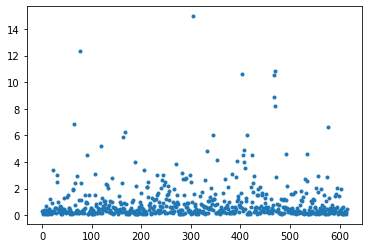

In [101]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(v_vars[v_vars > 0.1], '.')
plt.show()

In [127]:
import torch

/home/megvii/anaconda3/envs/paul-py3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [133]:
x = torch.rand(10, 32)
torch.max(x, dim=0)

torch.return_types.max(
values=tensor([0.9802, 0.7852, 0.8914, 0.6288, 0.8052, 0.9964, 0.9284, 0.7871, 0.9277,
        0.9885, 0.9680, 0.9229, 0.9778, 0.9293, 0.7119, 0.9898, 0.8312, 0.8901,
        0.9619, 0.9860, 0.9378, 0.9683, 0.6939, 0.9545, 0.9275, 0.7811, 0.9122,
        0.9497, 0.9969, 0.7546, 0.9806, 0.9876]),
indices=tensor([7, 2, 7, 8, 5, 7, 1, 6, 8, 9, 8, 6, 3, 4, 2, 9, 0, 2, 4, 9, 7, 6, 2, 0,
        5, 8, 3, 6, 9, 6, 0, 0]))

In [140]:
import torch.nn as nn
reg_head = nn.Linear(10,10, bias=False)
# nn.init.kaiming_uniform_(reg_head.weight, a=1)

In [141]:
lr = 0.001
lr *= 0.5
print(lr)
lr *= 0.5
print(lr)

0.0005
0.00025


In [165]:
import torch.nn as nn
fc = nn.Linear(10, 20)
x = torch.rand(3, 5, 10)
y = fc(x)
y.shape

torch.Size([3, 5, 20])

In [195]:
xx = np.load('../data/other_feat.npy', allow_pickle=True).item()
# xx.files
type(xx)

dict

In [199]:
xx[122].shape == (21, 1)

True

In [186]:
data[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed